## 2-6. Ensemble

### 1. Bagging
- 훈련 세트의 중복을 허용하여 샘플링하는 방식
- 샘플을 여러번 뽑아(Bootstrap) 각 모델을 학습시켜 결과물을 집계(Aggregation)하는 방식
- 학습된 모델의 결과를 집계하여 최종 결과 값 구함
- 분류: 최빈값(mode)
- 회귀: 평균값
- 최빈값이나 평균을 계산함으로써 편향과 분산 모두 감소
- 하나의 알고리즘을 훈련시킬 때와 비교해 편향은 비슷하지만 분산은 줄어듦

### (1) import dataset

In [1]:
from sklearn.datasets import make_moons

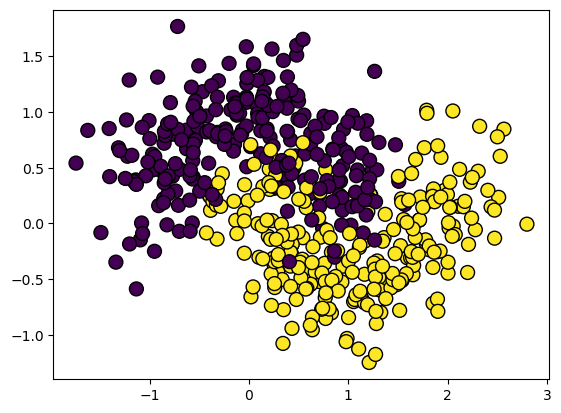

In [2]:
import matplotlib.pyplot as plt
X, y=make_moons(n_samples=500, noise=0.3, random_state=42)
# visualiation dataset
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=100, edgecolor='black')
plt.show()

### (2) data preprocesssing

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

### (3) model fitting

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

mybagging=BaggingClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=200, max_samples=100, bootstrap=True, random_state=42)
mybagging.fit(X_train, y_train)
y_pred1=mybagging.predict(X_test)

### (4) test model

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred1))

0.888


### 2. Boosting
### 2-1. Gradient Boosting

### (1) import dataset

In [9]:
import numpy as np

# 2차 곡성 형태의 data 생성
np.random.seed(22)
X = 2*np.random.randn(100, 1)
y = 2*X**2 + X*4 + 10 + np.random.randn(100, 1)

### (2) data preprocessing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

### (3) model fitting

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
mygbt=GradientBoostingRegressor(learning_rate=0.1, random_state=0)
mygbt.fit(X_train, y_train)
y_pred2=mygbt.predict(X_test)

C:\Users\Kim\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### (4) test model

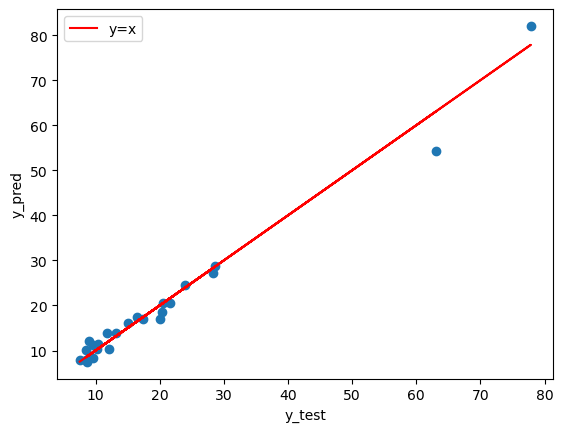

In [14]:
plt.scatter(y_test, y_pred2)
plt.plot(y_test, y_test, label = "y=x", color = "r")
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.legend()
plt.show()

### 2-2. XGBoost

### (1) import dataset

In [15]:
import pandas as pd
import numpy as np
import xgboost # xgboost package 가 install 되었는지 확인
import warnings
warnings.filterwarnings("ignore")

In [16]:
np.random.seed(22)
X = 2*np.random.randn(1000, 1)
y = 2*X**2 + X*4 + 10 + np.random.randn(1000, 1)

### (2) data preprocessing

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0)

### (3) model fitting

In [25]:
from xgboost import XGBRegressor
myxgb=xgboost.XGBRegressor(random_state=0)
myxgb.fit(X_train, y_train)
y_pred3=myxgb.predict(X_test)

### (4) test model

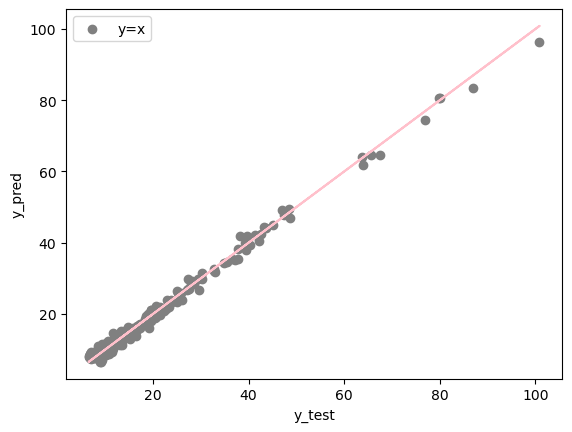

In [26]:
# Observed vs fitted
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred3, label='y=x', color='grey')
plt.plot(y_test, y_test, color='pink')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.legend()
plt.show()

### 2-3. random forest

### (1) import data

In [54]:
import pandas as pd
mydata=pd.read_csv('otto_data.csv')

In [55]:
mydata.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


### (2) data preprocessing

In [56]:
mydata=mydata.drop(['id'], axis=1)

In [57]:
mydata.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [58]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(mydata['target'])
mydata['target']=encoder.transform(mydata['target'])

In [59]:
mydata.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [60]:
X=mydata.iloc[:,:-1]
X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [61]:
y=mydata.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
61873    8
61874    8
61875    8
61876    8
61877    8
Name: target, Length: 61878, dtype: int32

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2 )

In [72]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49502, 93) (12376, 93) (49502,) (12376,)


### (3) model fitting

In [81]:
from sklearn.ensemble import RandomForestClassifier
myrf=RandomForestClassifier(n_estimators = 20, max_depth = 5, random_state = 42)
myrf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, random_state=42)

In [82]:
y_pred4=myrf.predict(X_test)

### (4) test model

In [83]:
# accuracy
print(accuracy_score(y_test, y_pred4))

0.6050420168067226
